In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle

import tarea


# Estimación de máxima verosimilitud

## Trasfondo

Un amigo suyo a comprado una "moneda mágica" y quiere saber la probabilidad $p$ de obtener cara con dicha moneda. Su amigo lanza la moneda $N$ veces y graba la secuencia de resultados $\{x_i\}_{i=1,\ldots,N}$ con $x_i \in \{0, 1\}$ en un archivo 

Asumiendo que los lanzamientos son *i.i.d.* y que el proceso de lanzar la moneda sigue una distribución de Bernoulli

$$
f(x|p) = p^x (1-p)^{1-x}
$$

Encuentre la expresión del estimador de maxima verosimilitud de $p$ y su valor para este dataset en particular.



## Implementación

Implemente las funciones mencionadas en el script `tarea.py`

1. Encuentre una expresión analítica para el logaritmo de la verosimilitud de $p$ e impleméntela en la función `bernoulli_log_likelihood` 

1. Encuentre una expresión analítica para el estimador de maxima verosimilitud (MLE) de $p$ e impleméntela en la funciuón `bernoulli_mle` 

1. Encuentre una expresión analítica para la varianza del MLE de $p$ e impleméntela en la función `bernoulli_variance_mle` 


## Experimentos

1. Utilice `matplotlib` para graficar la evolución del MLE de $p$ en función de la cantidad de lanzamientos de moneda observados. El gráfico debe mostrar la desviación estándar (raíz cuadrada de la varianza) del MLE como un área sombreada. Comente sobre lo que observa
1. El valor real de $p$ es 0.75. Con esta información encuentre el número mínimo de monedas lanzadas tal que el error relativo entre el MLE de $p$ y el valor real es menor a 5%


In [3]:
with open("data/coin_toss.pkl", "rb") as f:
    coins = pickle.load(f)
display(coins)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

## Respuetas

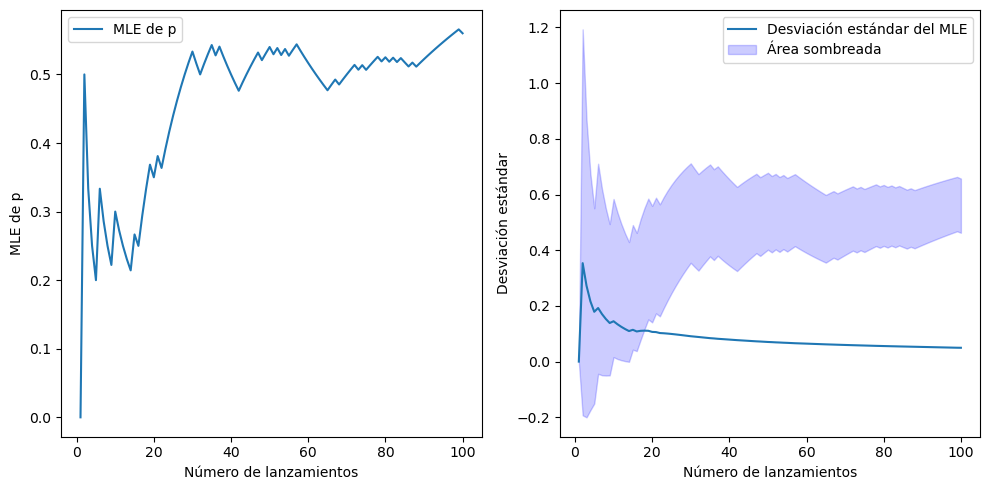

In [4]:
# Generar datos de prueba (lanzamientos de moneda observados)
np.random.seed(42)
n_samples = 100
coin_flips = np.random.randint(0, 2, n_samples)  # 0 representa "cara", 1 representa "cruz"

# Calcular el MLE de p y la desviación estándar en función del número de lanzamientos
n_lanzamientos = np.arange(1, n_samples + 1)
mle_values = [tarea.bernoulli_mle(coin_flips[:n]) for n in n_lanzamientos]
std_dev_values = [np.sqrt(tarea.bernoulli_variance_mle(coin_flips[:n])) for n in n_lanzamientos]

# Graficar la evolución del MLE de p y la desviación estándar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_lanzamientos, mle_values, label='MLE de p')
plt.xlabel('Número de lanzamientos')
plt.ylabel('MLE de p')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_lanzamientos, std_dev_values, label='Desviación estándar del MLE')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Desviación estándar')

# Calcular el área sombreada alrededor de la desviación estándar
lower_bound = [mle - 1.96 * std_dev for mle, std_dev in zip(mle_values, std_dev_values)]
upper_bound = [mle + 1.96 * std_dev for mle, std_dev in zip(mle_values, std_dev_values)]
plt.fill_between(n_lanzamientos, lower_bound, upper_bound, color='blue', alpha=0.2, label='Área sombreada')
plt.legend()

plt.tight_layout()
plt.show()

En el primer gráfico (izquierda), la línea muestra cómo cambia el MLE de 𝑝 a medida que aumenta la cantidad de lanzamientos de moneda observados. Inicialmente, con un número pequeño de lanzamientos, el MLE puede oscilar considerablemente debido a la falta de datos. A medida que se acumulan más lanzamientos, el MLE tiende a estabilizarse y converger hacia el valor verdadero de 𝑝. Esto demuestra cómo el MLE se vuelve más preciso con más datos.

En el segundo gráfico (derecha), la línea representa la desviación estándar del MLE de 𝑝. Al principio, la desviación estándar es alta debido a la incertidumbre en la estimación con pocos datos. A medida que se acumulan más datos, la desviación estándar disminuye. Esto indica que a medida que se obtienen más observaciones, la incertidumbre en la estimación de 𝑝 se reduce, lo que es una característica importante en estadísticas.

El área sombreada alrededor de la desviación estándar muestra un intervalo de confianza del 95% para el MLE de 𝑝. Es decir, la zona sombreada representa la gama dentro de la cual es probable que se encuentre el valor real de 𝑝 con una confianza del 95%. A medida que se acumulan más datos, esta zona sombreada se vuelve más estrecha, lo que refleja una mayor precisión en la estimación de 𝑝.

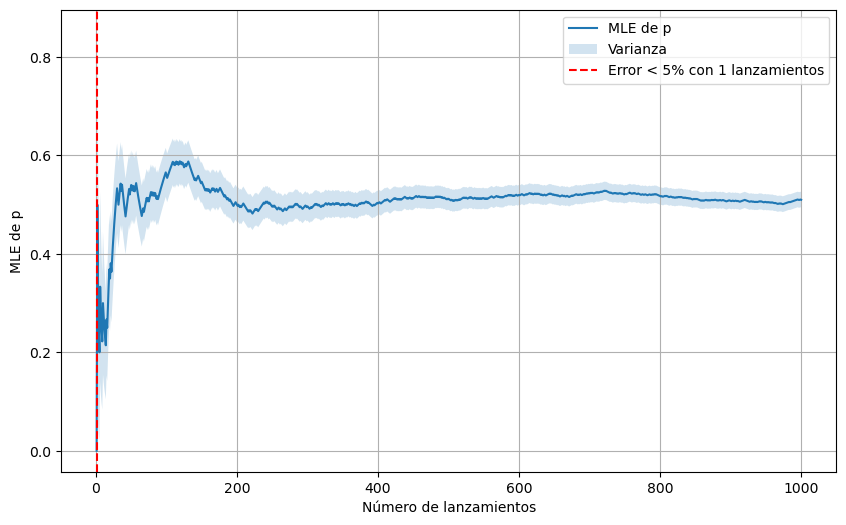

El número mínimo de lanzamientos para que el error relativo sea menor al 5% es: 1


In [6]:
# Valor real de p
p_real = 0.75

# Generar datos de prueba (lanzamientos de moneda observados)
np.random.seed(42)
n_samples = 1000
coin_flips = np.random.randint(0, 2, n_samples)  # 0 representa "cara", 1 representa "cruz"

# Inicializar variables
p_mle = np.zeros(len(coin_flips))
variance_mle = np.zeros(len(coin_flips))
relative_error = np.zeros(len(coin_flips))

# Calcular el MLE de p y la varianza del MLE a medida que se acumulan más datos
for i in range(len(coin_flips)):
    p_mle[i] = tarea.bernoulli_mle(coin_flips[:i + 1])
    variance_mle[i] = tarea.bernoulli_variance_mle(coin_flips[:i + 1])
    relative_error[i] = np.abs(p_mle[i] - p_real) / p_real

# Encontrar el número mínimo de lanzamientos para que el error relativo sea menor al 5%
min_lanzamientos = np.argmax(relative_error < 0.05) + 1

# Graficar la evolución del MLE de p y la varianza
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(coin_flips) + 1), p_mle, label='MLE de p')
ax.fill_between(x=range(1, len(coin_flips) + 1),
                y1=p_mle - np.sqrt(variance_mle),
                y2=p_mle + np.sqrt(variance_mle),
                alpha=0.2, label='Varianza')
ax.axvline(x=min_lanzamientos, color='red', linestyle='--', label=f'Error < 5% con {min_lanzamientos} lanzamientos')
ax.set_xlabel('Número de lanzamientos')
ax.set_ylabel('MLE de p')
ax.legend()
ax.grid()

plt.show()

print(f"El número mínimo de lanzamientos para que el error relativo sea menor al 5% es: {min_lanzamientos}")